In [2]:
import pandas as pd
import numpy as np
import collections
collections.Iterable = collections.abc.Iterable
collections.Mapping = collections.abc.Mapping
collections.MutableSet = collections.abc.MutableSet
collections.MutableMapping = collections.abc.MutableMapping
import dalmatian
from matplotlib import pyplot as plt

import os

import gcsfs
from google.auth import default
import subprocess

# from convert_maf import hg38_convert_to_dig_format

# Loading data from Terra workspace

In [3]:
namespace = 'Claflin_chrY'
workspace = 'TCGA_UVM_WGS_ControlledAccess_hg38_V1-0_DATA'

credentials, _ = default()

gcs = gcsfs.GCSFileSystem('namespace', token=credentials)
wm = dalmatian.WorkspaceManager(namespace + '/' + workspace)

In [4]:
dir_mafs = './mafs'

## Localize MAFs from Terra

In [5]:
list_mafs = os.listdir(dir_mafs)
gs_mafs =  wm.get_pairs().mutation_validator_validated_maf_WGS.tolist()
for rpath in gs_mafs:
    fname = rpath.split('/')[-1]
    if fname[-4:] == '.maf':
        if fname not in list_mafs:
            gcs.get(rpath, f'{dir_mafs}/{fname}')

## Concatenate MAFs

In [6]:
list_mafs = os.listdir(dir_mafs)
count = 0 
for fn in list_mafs:
    if fn[-4:] == '.maf':
        count += 1 
        if count == 1:
            df1 = pd.read_csv(dir_mafs + f'/{fn}', sep='\t')
        else:
            df1 = pd.concat([df1, pd.read_csv(dir_mafs + f'/{fn}', sep='\t')], axis=0)
df1.to_csv('./tcga_uvm_wgs.maf', sep='\t')

/var/folders/7d/ccyblkpj6wvbl5n45y_l75180000gq/T/ipykernel_45527/583138174.py:9: DtypeWarning: Columns (13,38,90,92,94,95,96,97,99,100,101,103,104,135,142,143,145,146,147,148,149,150,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,179,180,181,184,185,186,188,190,191) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.concat([df1, pd.read_csv(dir_mafs + f'/{fn}', sep='\t')], axis=0)


,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_position,End_position,Strand,Variant_Classification,Variant_Type,...,dbSNP_VP,dbSNP_WGT,dbSNP_WTD,dbSNP_dbSNPBuildID,dbSNP_ID,dbSNP_FILTER,HGNC_Entrez_Gene_ID(supplied_by_NCBI),dbSNP_RSPOS,dbSNP_VLD,SOMATIC
0,Unknown,NaN,UNKNOWN,hg38,chr1,4955594,4955594,+,IGR,SNP,...,0x050000000005000002000100,1,false,151,rs1341489630,NaN,NaN,4955594,false,True
1,AL139823.1,NaN,UNKNOWN,hg38,chr1,5312326,5312326,+,5'Flank,SNP,...,NaN,NaN,false,NaN,NaN,NaN,NaN,NaN,false,True
2,Unknown,NaN,UNKNOWN,hg38,chr1,5470093,5470093,+,IGR,SNP,...,NaN,NaN,false,NaN,NaN,NaN,NaN,NaN,false,True
3,ACOT7,11332.0,UNKNOWN,hg38,chr1,6389851,6389851,+,5'Flank,SNP,...,NaN,NaN,false,NaN,NaN,NaN,11332.0,NaN,false,True
4,SLC2A5,6518.0,UNKNOWN,hg38,chr1,9060027,9060027,+,Intron,SNP,...,0x050000080005000002000100,1,false,151,rs1432929090,NaN,6518.0,9060027,false,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802,Unknown,NaN,UNKNOWN,hg38,chrX,147809369,147809369,+,IGR,SNP,...,NaN,NaN,false,NaN,NaN,NaN,NaN,NaN,false,True
1803,RNU6-382P,106479735.0,UNKNOWN,hg38,chrX,147826010,147826010,+,5'Flank,SNP,...,NaN,NaN,false,NaN,NaN,NaN,106479735.0,NaN,false,True
1804,MAGEA4-AS1,NaN,UNKNOWN,hg38,chrX,151906868,151906868,+,RNA,SNP,...,NaN,NaN,false,NaN,NaN,NaN,NaN,NaN,false,True
1805,GAB3,139716.0,UNKNOWN,hg38,chrX,154699367,154699367,+,Silent,SNP,...,NaN,NaN,false,NaN,NaN,NaN,139716.0,NaN,false,True


In [10]:
df1.reset_index()[['Hugo_Symbol', 'NCBI_Build', 'Chromosome', 'Start_position', 'End_position', 'Strand', 'Variant_Classification', 'Variant_Type', 'Tumor_Sample_Barcode']]

,Hugo_Symbol,NCBI_Build,Chromosome,Start_position,End_position,Strand,Variant_Classification,Variant_Type,Tumor_Sample_Barcode
0,Unknown,hg38,chr1,4955594,4955594,+,IGR,SNP,TCGA-WC-AA9E-01A
1,AL139823.1,hg38,chr1,5312326,5312326,+,5'Flank,SNP,TCGA-WC-AA9E-01A
2,Unknown,hg38,chr1,5470093,5470093,+,IGR,SNP,TCGA-WC-AA9E-01A
3,ACOT7,hg38,chr1,6389851,6389851,+,5'Flank,SNP,TCGA-WC-AA9E-01A
4,SLC2A5,hg38,chr1,9060027,9060027,+,Intron,SNP,TCGA-WC-AA9E-01A
...,...,...,...,...,...,...,...,...,...
159664,Unknown,hg38,chrX,147809369,147809369,+,IGR,SNP,TCGA-VD-AA8P-01A
159665,RNU6-382P,hg38,chrX,147826010,147826010,+,5'Flank,SNP,TCGA-VD-AA8P-01A
159666,MAGEA4-AS1,hg38,chrX,151906868,151906868,+,RNA,SNP,TCGA-VD-AA8P-01A
159667,GAB3,hg38,chrX,154699367,154699367,+,Silent,SNP,TCGA-VD-AA8P-01A


# Aggregated MAFs localized from the Broad Cluster

In [6]:
df2 = pd.read_csv('TCGA_WGS_UVM.validated.maf', sep='\t', low_memory=False, encoding='iso-8859-1')

In [7]:
sum(df2.Tumor_Seq_Allele2 == df2.Reference_Allele)

0

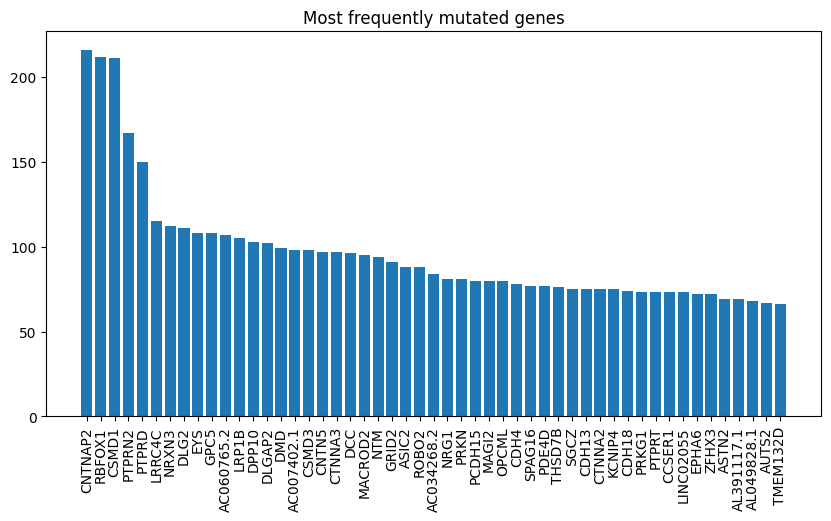

In [8]:
hs, freq = np.unique(df2.Hugo_Symbol, return_counts=True)
ind_sorted = np.argsort(freq)[::-1]
hs = hs[ind_sorted] 
freq = freq[ind_sorted]

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(hs[1:52], freq[1:52])
ax.set_title('Most frequently mutated genes')
plt.xticks(rotation=90)
plt.show()

In [9]:
df_sid_hs = df2.groupby(['Tumor_Sample_Barcode', 'Hugo_Symbol']).count()

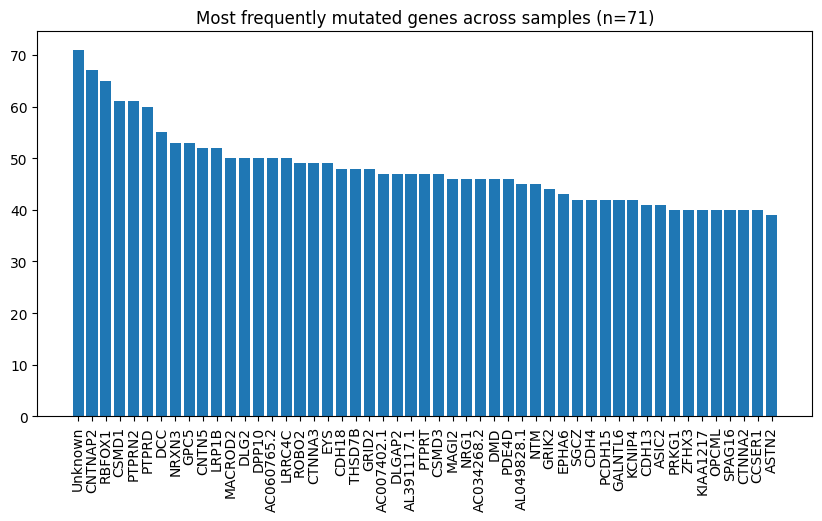

In [10]:
hs, freq = np.unique(df_sid_hs.index.to_frame().Hugo_Symbol, return_counts=True)
ind_sorted = np.argsort(freq)[::-1]
hs = hs[ind_sorted]
freq = freq[ind_sorted]

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(hs[:51], freq[:51])
ax.set_title(f'Most frequently mutated genes across samples (n={df2.Tumor_Sample_Barcode.unique().shape[0]})')
plt.xticks(rotation=90)
plt.show()

# Converting MAF to DIG-compatible format

In [11]:
# hg38 maf file to convert
# fn = './tcga_uvm_wgs.maf'
fn = './TCGA_WGS_UVM.validated.maf'
# using function from Oliver's script
hg38_convert_to_dig_format(fn , fn.split('.maf')[0] + '_dig.tsv', './hg38ToHg19.over.chain.gz')

loading maf file...
reduce to essential columns to save memory and speed up loading
lifting over variants...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 159669/159669 [00:06<00:00, 25095.45it/s]

converting MAF to DIG format...


In [14]:
pd.read_csv(fn.split('.maf')[0] + '_dig.tsv', sep='\t')

,1,1107113,1107114,A,C,TCGA-RZ-AB0B-01A
0,1,3717747,3717748,T,G,TCGA-RZ-AB0B-01A
1,1,4941478,4941479,T,G,TCGA-RZ-AB0B-01A
2,1,7547571,7547572,T,G,TCGA-RZ-AB0B-01A
3,1,7858112,7858113,A,C,TCGA-RZ-AB0B-01A
4,1,9498940,9498941,T,G,TCGA-RZ-AB0B-01A
...,...,...,...,...,...,...
159267,23,154255084,154255085,C,T,TCGA-YZ-A985-01A
159268,23,154259882,154259883,G,A,TCGA-YZ-A985-01A
159269,23,154271176,154271177,C,T,TCGA-YZ-A985-01A
159270,23,155044815,155044816,G,A,TCGA-YZ-A985-01A


In [12]:
files = gcs.ls('gs://getzlab-workflows-reference_files-oa')
files

['getzlab-workflows-reference_files-oa/10x_references',
 'getzlab-workflows-reference_files-oa/CRAM_cache',
 'getzlab-workflows-reference_files-oa/Homo_sapiens_assembly38.GP.V1.5.haplotype_database.txt',
 'getzlab-workflows-reference_files-oa/MSMuTect',
 'getzlab-workflows-reference_files-oa/MutSig2CV',
 'getzlab-workflows-reference_files-oa/categs.txt',
 'getzlab-workflows-reference_files-oa/cga_pipeline_config_optional_parameters_DeTiN201.json',
 'getzlab-workflows-reference_files-oa/clumps',
 'getzlab-workflows-reference_files-oa/funcotator',
 'getzlab-workflows-reference_files-oa/gatk-package-4.0.5.1-local.jar',
 'getzlab-workflows-reference_files-oa/gatk-package-4.1.4.0-local.jar',
 'getzlab-workflows-reference_files-oa/gatk-protected.jar',
 'getzlab-workflows-reference_files-oa/genes_BRCA.doi_10.1038_nature17676.txt',
 'getzlab-workflows-reference_files-oa/genes_CGC.2019_10_21.txt',
 'getzlab-workflows-reference_files-oa/hg19',
 'getzlab-workflows-reference_files-oa/hg38',
 'getz